In [34]:
import rust_json_module
import glob

comment_files = glob.glob("./data/comments/*")
conversations_files = glob.glob("./data/conversations/*")
submissions_files = glob.glob("./data/submissions/*")


# List of JSON file paths
file_paths = comment_files + conversations_files + submissions_files

# Call the Rust function
topics = rust_json_module.process_files(file_paths)

# Access the results
for topic in topics:
    print(f"Topic: {topic.name}")
    print(f"Total References: {topic.total_references}")
    print("Supporting References per Date:")
    for date, count in topic.support_references_per_date.items():
        print(f"  {date}: {count}")
    print("Opposing References per Date:")
    for date, count in topic.oppose_references_per_date.items():
        print(f"  {date}: {count}")
    print("Neutral References per Date:")
    for date, count in topic.neutral_references_per_date.items():
        print(f"  {date}: {count}")

Topic: Israeli Incursions in Tulkarm (August 2023)
Total References: 165128
Supporting References per Date:
  2023-10-26: 811
  2023-10-23: 910
  2023-09-25: 38
  2023-08-17: 36
  2023-09-29: 58
  2023-09-18: 59
  2023-08-03: 33
  2023-09-11: 26
  2023-10-04: 39
  2023-10-11: 664
  2023-10-07: 524
  2023-10-17: 1168
  2023-10-30: 1120
  2023-10-22: 864
  2023-09-08: 45
  2023-09-12: 27
  2023-09-15: 11
  2023-08-20: 46
  2023-11-16: 1276
  2023-10-16: 801
  2023-11-17: 1047
  2023-10-01: 18
  2023-10-13: 932
  2023-08-10: 44
  2023-08-27: 4
  2023-10-24: 888
  2023-11-06: 948
  2023-08-07: 77
  2023-10-05: 29
  2023-11-11: 987
  2023-11-18: 1087
  2023-09-16: 31
  2023-08-13: 30
  2023-10-14: 877
  2023-09-03: 40
  2023-11-20: 1113
  2023-09-24: 84
  2023-09-26: 45
  2023-08-19: 30
  2023-11-25: 712
  2023-09-30: 40
  2023-08-09: 37
  2023-11-29: 734
  2023-09-14: 54
  2023-09-04: 25
  2023-09-20: 39
  2023-08-15: 54
  2023-10-09: 590
  2023-10-19: 869
  2023-09-27: 40
  2023-09-13: 49

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
dates = topics[0].support_references_per_date.keys()
total_neutral_posts_per_date = {}
total_oppose_posts_per_date = {}
total_support_posts_per_date = {}

for date in dates:
    neutral = 0
    oppose = 0
    support = 0
    for topic in topics:
        if date in topic.neutral_references_per_date:
            neutral += topic.neutral_references_per_date[date]
        else:
            topic.neutral_references_per_date[date] = 0
        if date in topic.oppose_references_per_date:
            oppose += topic.oppose_references_per_date[date]
        else:
            topic.oppose_references_per_date[date] = 0

        if date in topic.support_references_per_date:
            support += topic.support_references_per_date[date]
        else:
            topic.support_references_per_date[date] = 0
    total_neutral_posts_per_date[date] = neutral
    total_oppose_posts_per_date[date] = oppose
    total_support_posts_per_date[date] = support

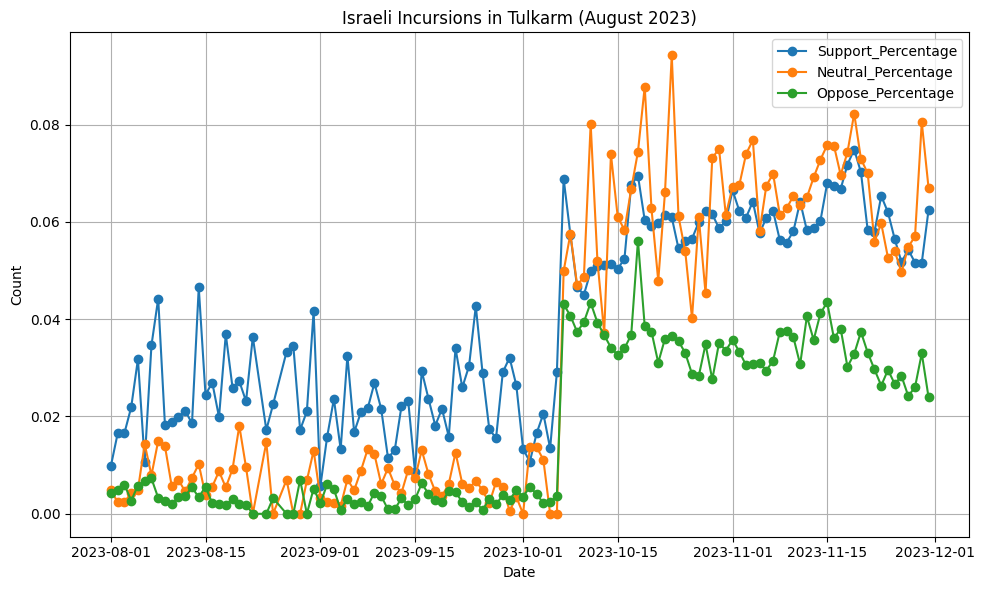

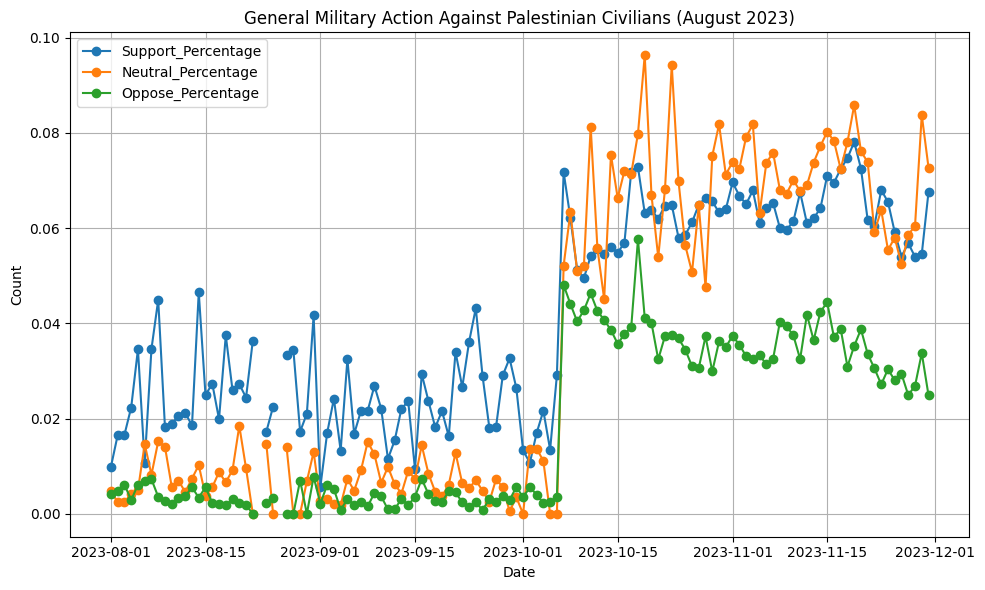

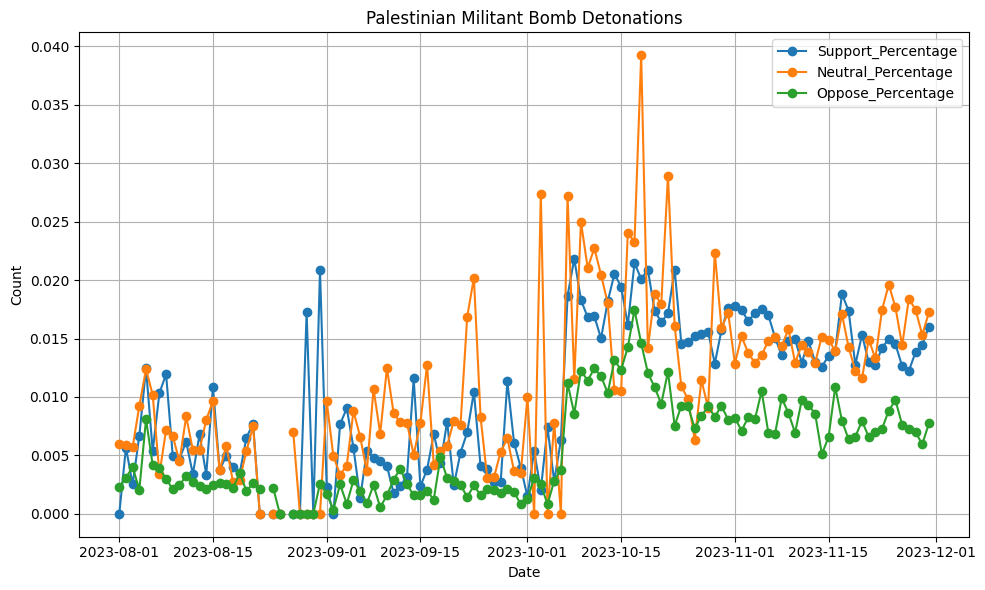

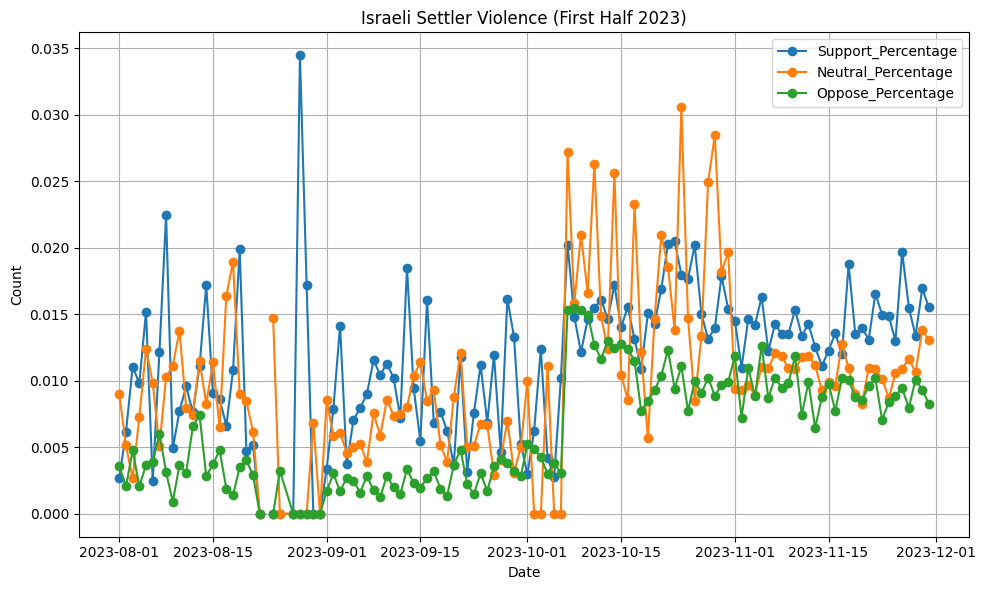

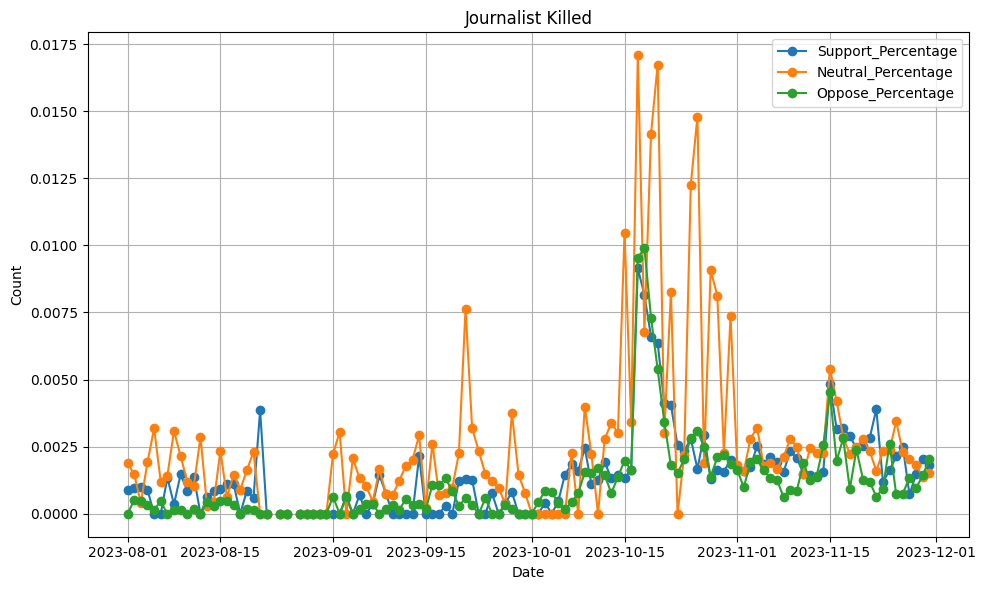

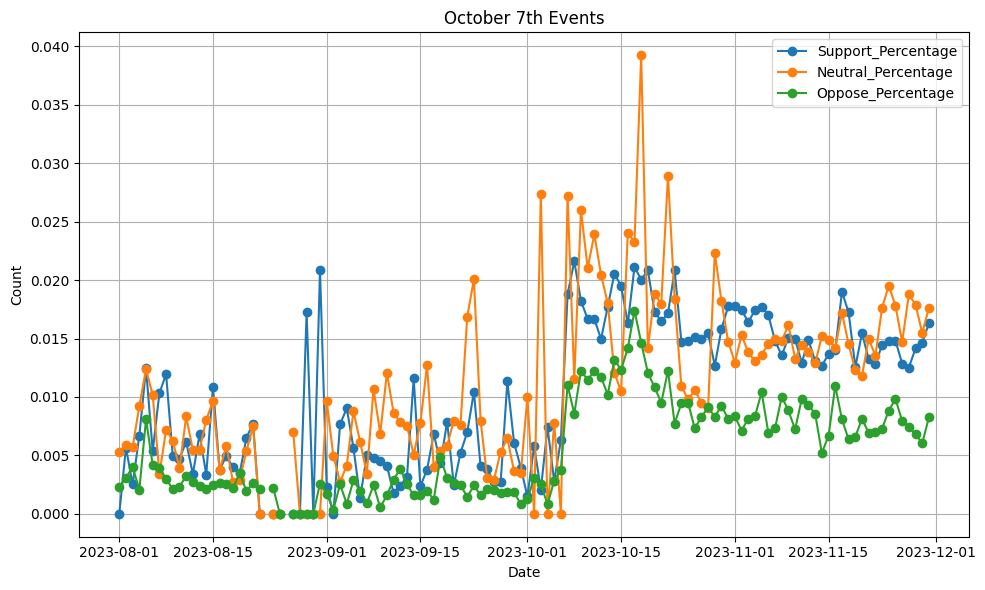

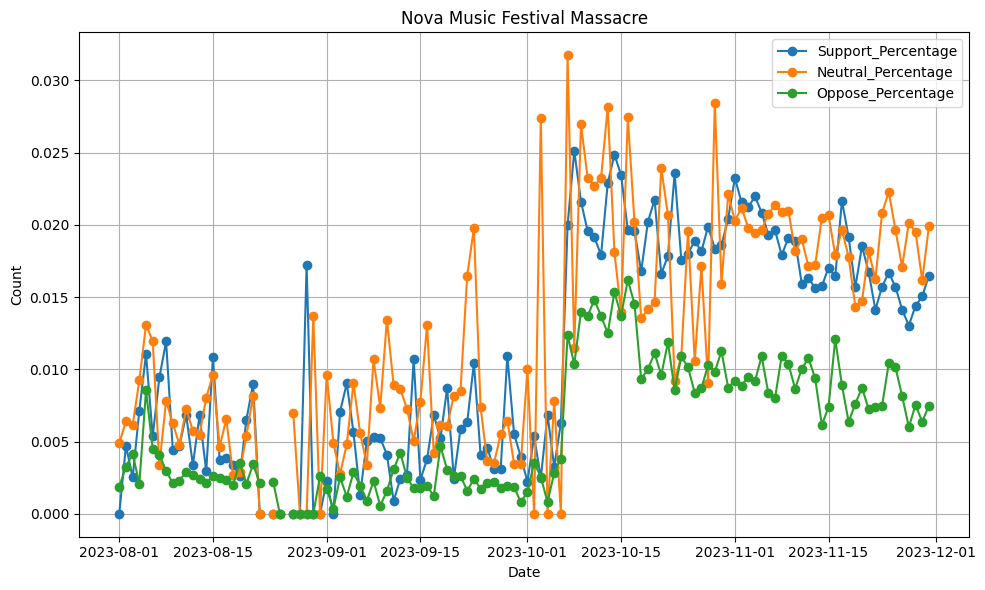

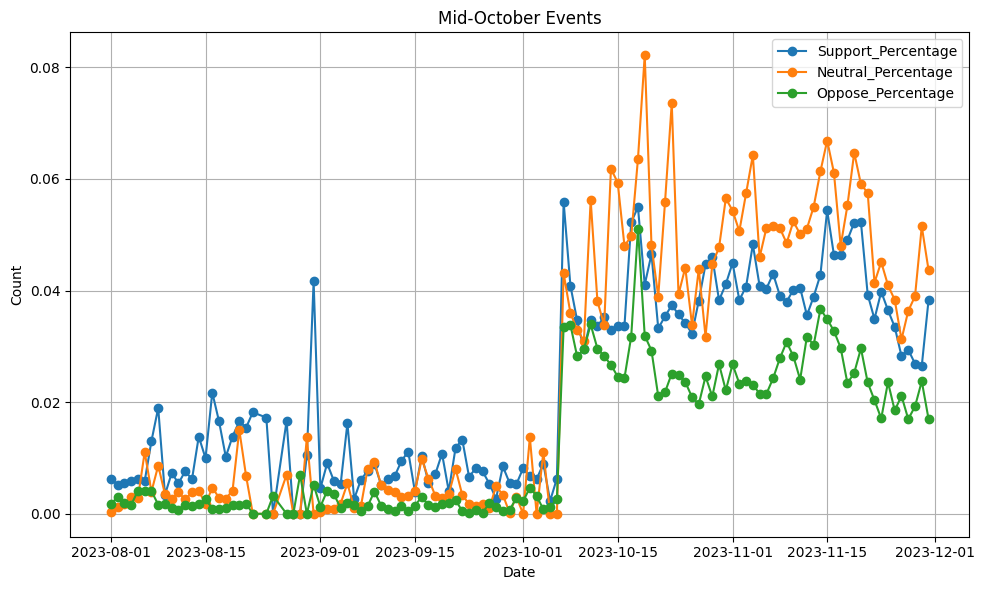

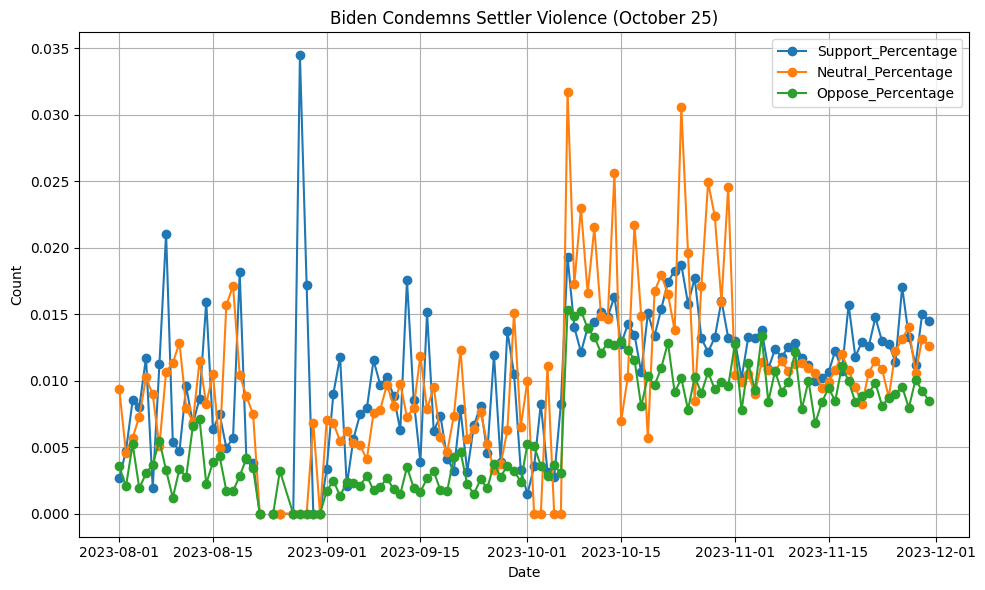

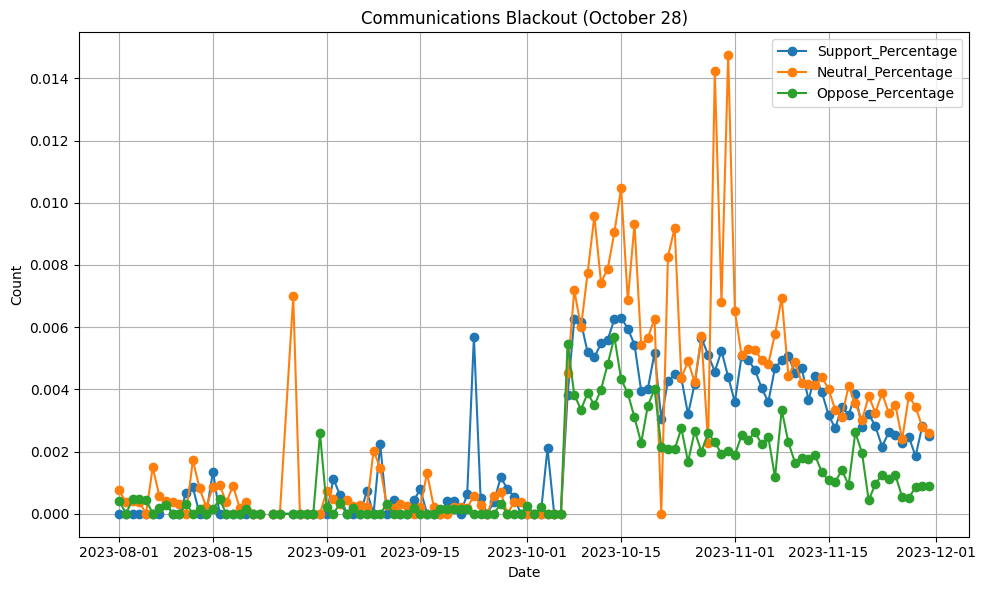

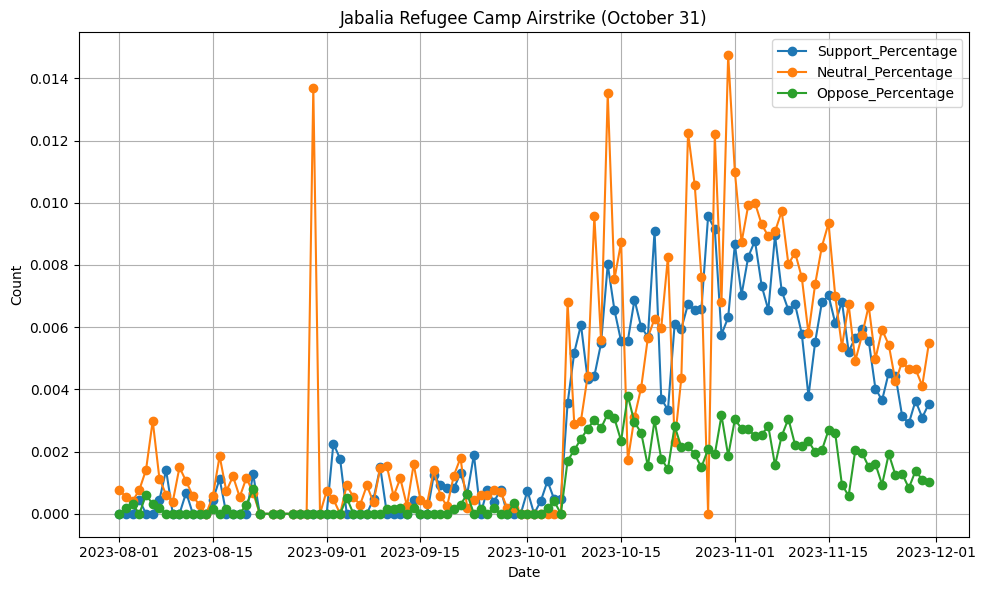

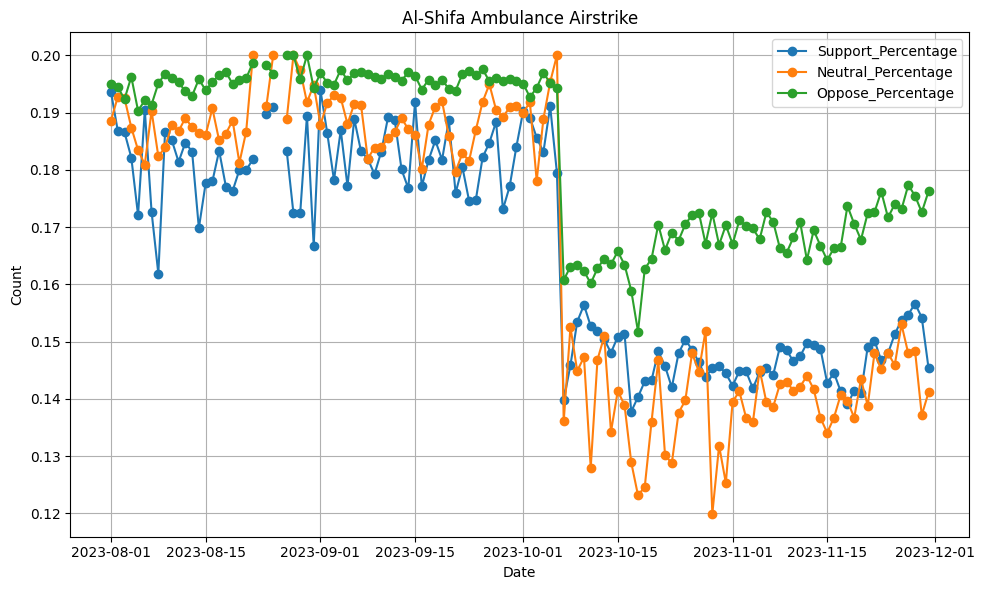

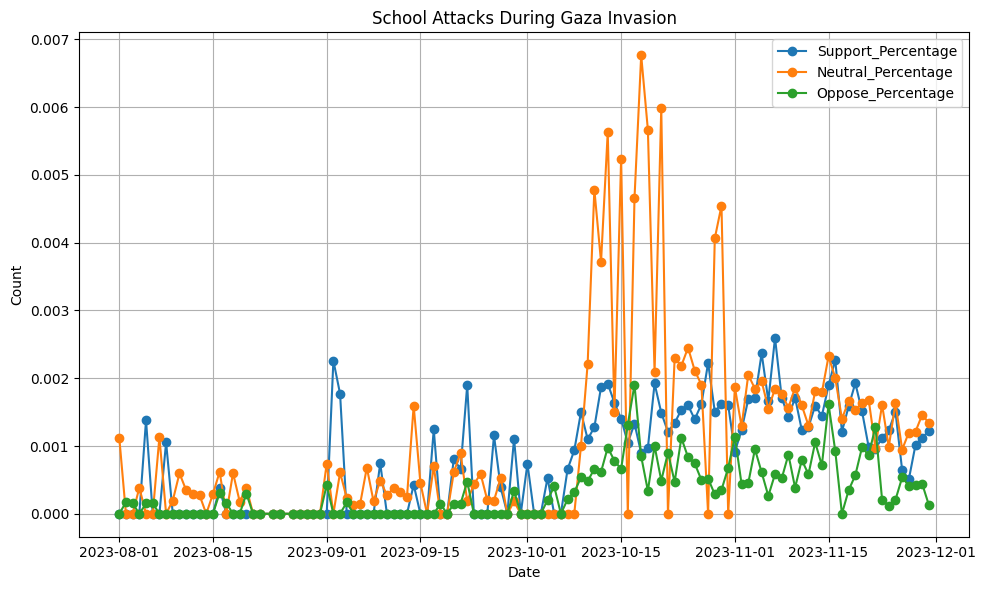

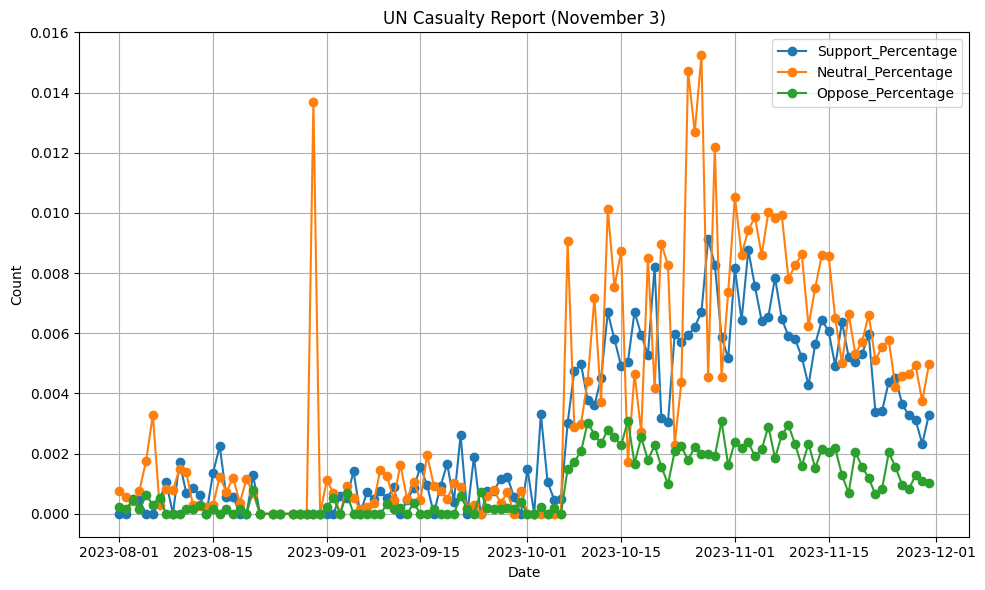

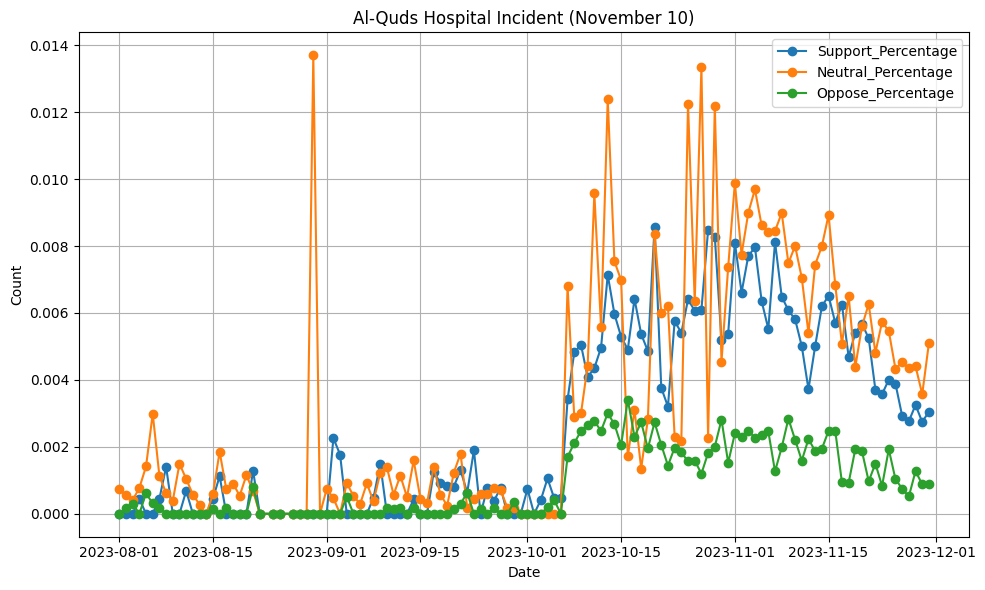

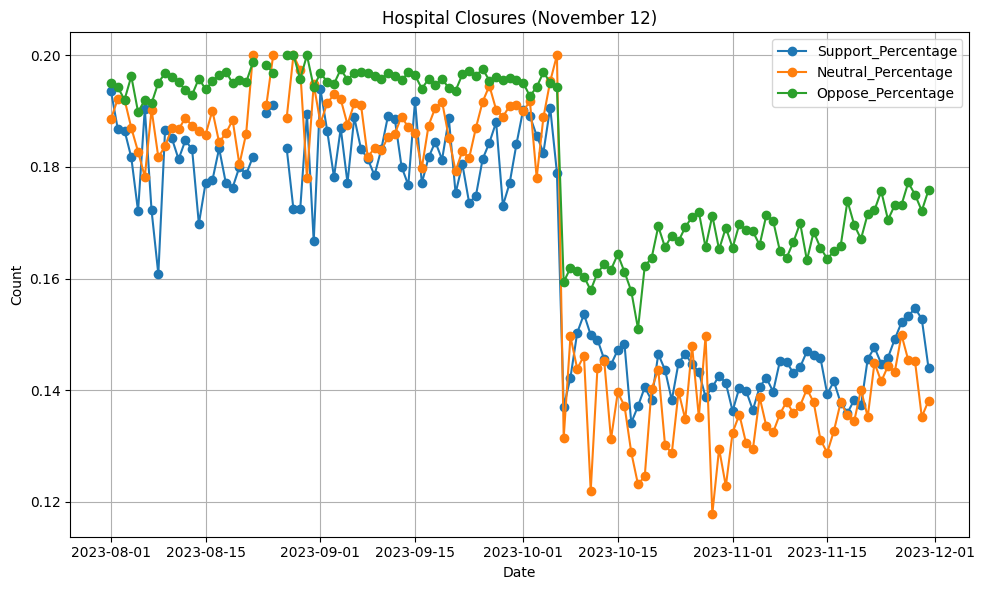

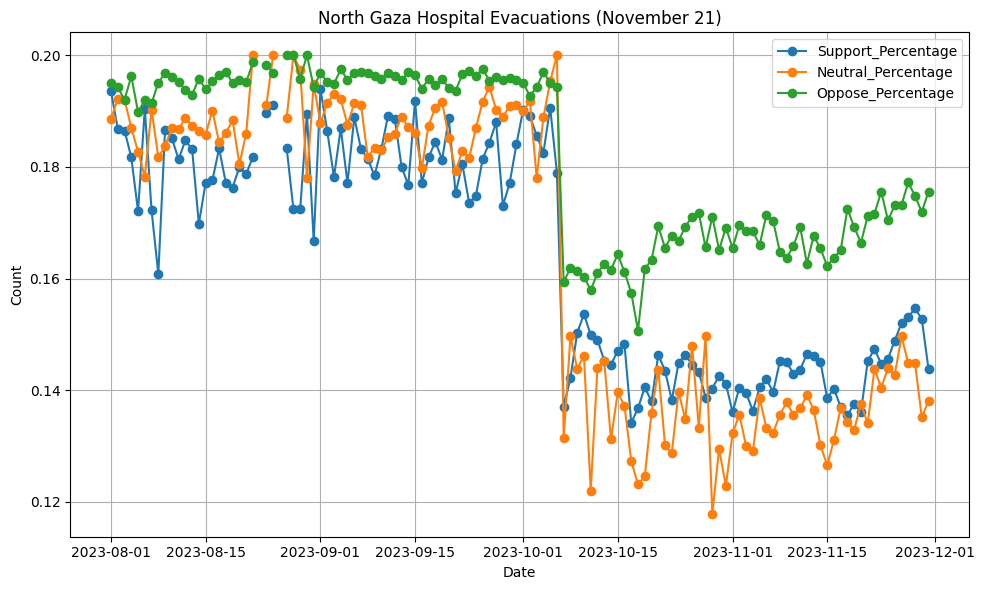

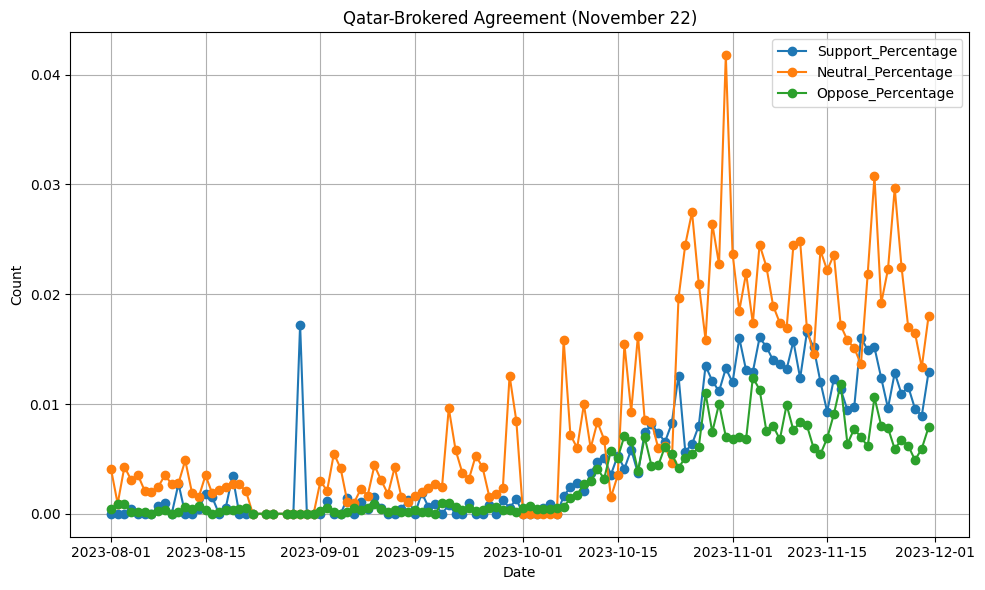

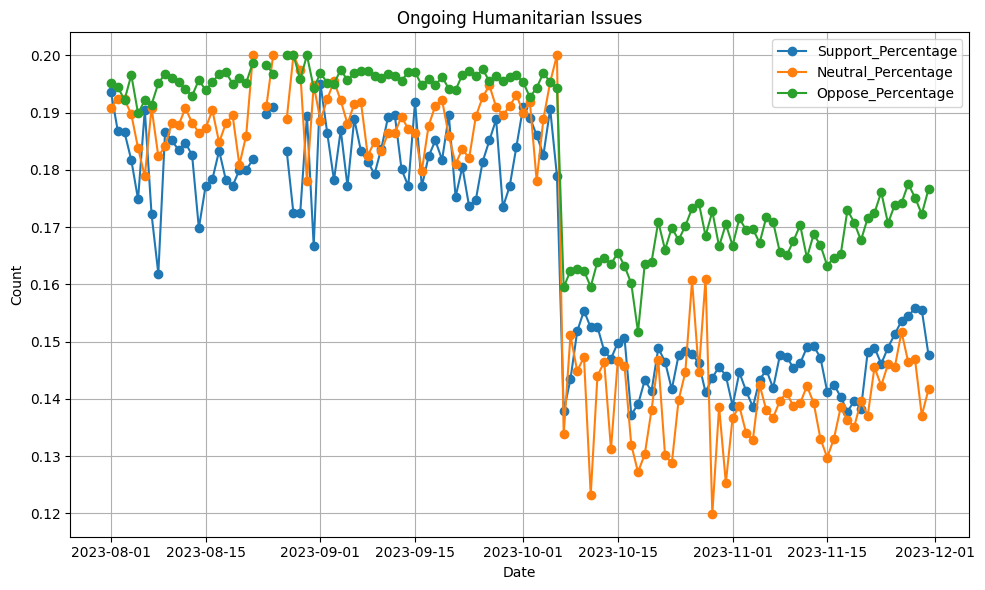

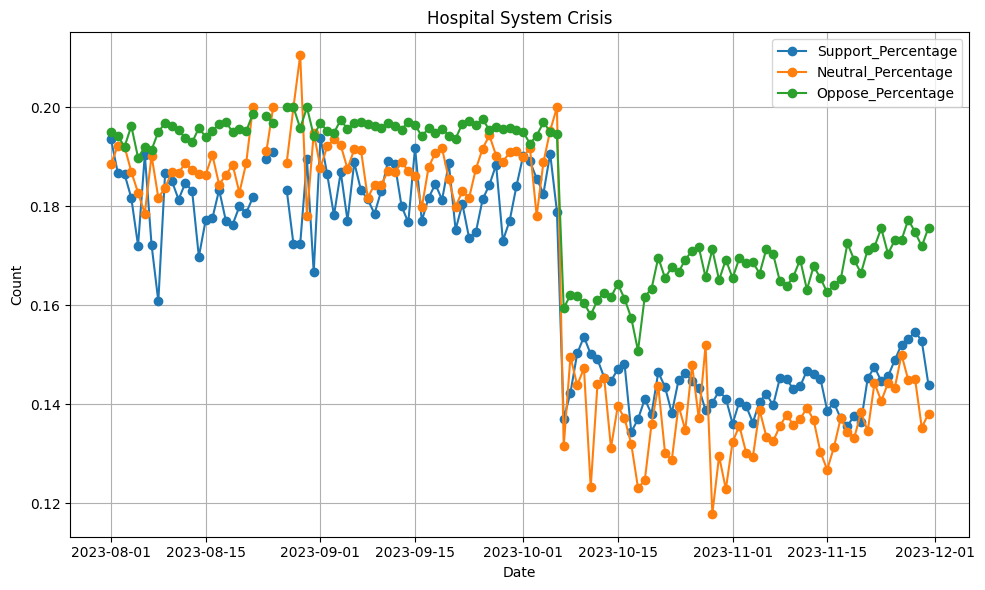

In [40]:
for topic in topics:
    support = topic.support_references_per_date
    neutral = topic.neutral_references_per_date
    oppose = topic.oppose_references_per_date
    
    df_support = pd.DataFrame(list(support.items()), columns=['Date', 'Support'])
    df_neutral = pd.DataFrame(list(neutral.items()), columns=['Date', 'Neutral'])
    df_oppose = pd.DataFrame(list(oppose.items()), columns=['Date', 'Oppose'])
    df_neutral_total_posts = pd.DataFrame(list(total_neutral_posts_per_date.items()), columns=['Date', 'Neutral_Posts'])
    df_oppose_total_posts = pd.DataFrame(list(total_oppose_posts_per_date.items()), columns=['Date', 'Oppose_Posts'])
    df_support_total_posts = pd.DataFrame(list(total_support_posts_per_date.items()), columns=['Date', 'Support_Posts'])

    df = df_support.merge(df_neutral, on='Date', how='outer').merge(df_oppose, on='Date', how='outer').merge(df_neutral_total_posts, on='Date', how='outer').merge(df_oppose_total_posts, on='Date', how='outer').merge(df_support_total_posts, on='Date', how='outer')
    df.fillna(0, inplace=True)
    df["Support_Percentage"] = df["Support"] / df["Support_Posts"]
    df["Neutral_Percentage"] = df["Neutral"] / df["Neutral_Posts"]
    df["Oppose_Percentage"] = df["Oppose"] / df["Oppose_Posts"]

    df['Date'] = pd.to_datetime(df['Date'])

    plt.figure(figsize=(10, 6))
    # plt.plot(df['Date'], df['Support'], label='Support', marker='o')
    # plt.plot(df['Date'], df['Neutral'], label='Neutral', marker='o')
    # plt.plot(df['Date'], df['Oppose'], label='Oppose', marker='o')

    plt.plot(df['Date'], df['Support_Percentage'], label='Support_Percentage', marker='o')
    plt.plot(df['Date'], df['Neutral_Percentage'], label='Neutral_Percentage', marker='o')
    plt.plot(df['Date'], df['Oppose_Percentage'], label='Oppose_Percentage', marker='o')

    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(topic.name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [38]:
df

,Date,Support,Neutral,Oppose,Neutral_Posts,Oppose_Posts,Support_Posts,Support_Percentage,Neutral_Percentage,Oppose_Percentage
0,2023-08-01,216,503,931,2667.0,4774.0,1116.0,0.193548,0.188601,0.195015
1,2023-08-02,396,1047,1132,5448.0,5827.0,2120.0,0.186792,0.192181,0.194268
2,2023-08-03,371,940,1249,4894.0,6504.0,1989.0,0.186526,0.192072,0.192036
3,2023-08-04,407,486,1230,2599.0,6268.0,2240.0,0.181696,0.186995,0.196235
4,2023-08-05,249,517,1243,2829.0,6547.0,1447.0,0.172080,0.182750,0.189858
...,...,...,...,...,...,...,...,...,...,...
117,2023-11-26,2131,4271,1615,28465.0,9324.0,14012.0,0.152084,0.150044,0.173209
118,2023-11-27,2104,3867,1714,26684.0,9666.0,13741.0,0.153118,0.144918,0.177323
119,2023-11-28,2427,3587,1646,24711.0,9415.0,15687.0,0.154714,0.145158,0.174827
120,2023-11-29,2173,3977,1564,29391.0,9097.0,14222.0,0.152791,0.135314,0.171925


In [39]:
plt.plot(, label="Supporting", marker='o')


SyntaxError: invalid syntax (1664803486.py, line 1)

In [ ]:
for topic in topics.topics:
    df = prepare_topic_data(topic)
    plt.figure(figsize=(10, 6))
    plt.plot(df["date"], df["supporting"], label="Supporting", marker='o')
    plt.plot(df["date"], df["opposing"], label="Opposing", marker='x')
    plt.plot(df["date"], df["neutral"], label="Neutral", marker='s')
    
    plt.title(f"Topic: {topic.name}")
    plt.xlabel("Date")
    plt.ylabel("Number of References")
    plt.legend()
    plt.grid(True)
    plt.show()